\usepackage{amsmath}
\usepackage{amsfonts}
\usepackage{amssymb}

\definecolor{ashBlack}{HTML}{111111}
\definecolor{matrixGreen}{HTML}{03A062}
\definecolor{matrixBlue}{HTML}{03A0C2}
\definecolor{maizeCrayola}{HTML}{E8C547}
\definecolor{blueGray}{HTML}{6290C3}
\definecolor{ruby}{HTML}{D81E5B}

# nb2wb: Publish Jupyter Notebooks to the Web

I am writing most of my posts in Jupyter Notebooks; it's the best way to create math-and-code-rich technical content.

However, publishing Notebooks to platforms like X articles is painful, so I quickly vibecoded a tool that does the heavy lifting for you. This post is a demonstration, [you can find the source on GitHub](https://github.com/the-palindrome/nb2wb/blob/main/examples/x_article.ipynb).

I wrote the post, ran

```
nb2wb x_article.ipynb -t x
```

and copy-pasted this with a single click from the HTML that `nb2wb` built. (Well, and one click for each image, as I didn't find a solution to handle multiple image copy-pastes to the X Article editor. But that's in progress.)

Here’s a quick tour of what this tool can do.

## Inline Math → Unicode

Inline LaTeX like `$E = mc^2$` becomes plain Unicode: $E = mc^2$.

This works for Greek letters ($\alpha$, $\beta$, $\gamma$),
fractions ($\frac{1 + \sqrt{5}}{2}$), and common notation (like $\nabla f$, or $\mathbf{x} \in \mathbb{R}^n$). No images needed — it’s just text.

## Display Math → Crisp Images

Block equations are rendered to PNG, with support for equation references. For instance, this is the Bayes' formula:

$$P({\color{maizeCrayola} A} \mid {\color{blueGray} B}) = \frac{P({\color{blueGray} B} \mid {\color{maizeCrayola} A})\, P({\color{maizeCrayola} A})}{P({\color{blueGray} B})} \label{eq:bayes}$$

Later in your article, you can reference the equation above with \\`\label{eq:bayes}` that renders to \eqref{eq:bayes} in the text.

Multi-line LaTeX snippets are also supported:

$$
\begin{align*}
\text{Var}(X) &= E[(X - \mu)^2] \\
              &= E[X^2] - (E[X])^2
\end{align*}
$$

## Code → Syntax-Highlighted Images

Code cells are rendered as themed, syntax-highlighted images—so colors
and formatting survive any editor.

In [1]:
def sieve(n):
    """Return all primes less than n."""
    is_prime = [True] * n
    is_prime[0] = is_prime[1] = False
    for i in range(2, int(n**0.5) + 1):
        if is_prime[i]:
            for j in range(i*i, n, i):
                is_prime[j] = False
    return [i for i, p in enumerate(is_prime) if p]

print(f"primes under 30: {sieve(30)}")

primes under 30: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


## Figures

Matplotlib plots are embedded directly.

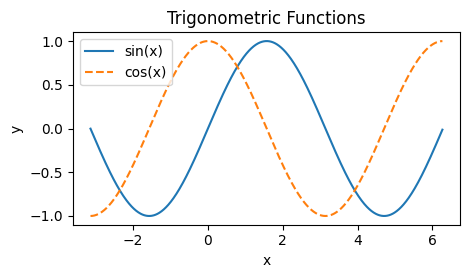

In [2]:
import matplotlib.pyplot as plt
import math

x = [i / 100 for i in range(-314, 628)]
y_sin = [math.sin(v) for v in x]
y_cos = [math.cos(v) for v in x]

fig, ax = plt.subplots(figsize=(4.8, 2.88))
ax.plot(x, y_sin, label="sin(x)")
ax.plot(x, y_cos, label="cos(x)", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("Trigonometric Functions")
plt.tight_layout()
plt.show()

The plot above used the `hide-input` tag—the code is hidden, only
the figure appears. Other tags: `hide-output` (show code only)
and `hide-cell` (omit entirely). Great for keeping articles clean.

## Try It

Install and convert in two commands:

```
pip install nb2wb
nb2wb notebook.ipynb -t x --open
```

The `-t x` flag targets X Articles.
The generated HTML page has copy buttons for each image and a
one-click "Copy article text" that inserts placeholders where images go.

Write in Jupyter. Publish everywhere.